## Do the imports

In [266]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Import and view the data

In [267]:
data = pd.read_excel("twitter.xlsx")

In [268]:
data.head()

,Column1.created_at,Date,Time,Column1.text,Own or Retweet?,Column1.truncated,Column1.metadata,Column1.source,Source,Column1.is_quote_status,Column1.retweet_count,Column1.favorite_count,Column1.lang
0,Wed Dec 01 08:10:06,2001-12-01,08:10:06,"RT @IGN: In this new trailer, Master Chief car...",Retweet,False,[Record],"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,False,246,0,en
1,Wed Dec 01 08:09:59,2001-12-01,08:09:59,RT @Woodkid: Thank you @HIDEO_KOJIMA_EN ! http...,Retweet,False,[Record],"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,False,273,0,en
2,Wed Dec 01 08:09:47,2001-12-01,08:09:47,RT @DannyBoi_2077: Truck ran out of juice.. so...,Retweet,False,[Record],"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,False,16,0,en
3,Wed Dec 01 05:05:35,2001-12-01,05:05:35,RT @DannyBoi_2077: My reaction when the day DS...,Retweet,False,[Record],"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,False,17,0,en
4,Wed Dec 01 03:38:59,2001-12-01,03:38:59,"RT @RetroNewsNow: 🎄On November 30, 1977, durin...",Retweet,False,[Record],"<a href=""http://twitter.com/download/iphone"" r...",iPhone,False,314,0,en


## Subset the columns for analysis

In [269]:
data1 = data[["Column1.text", "Own or Retweet?", "Column1.retweet_count"]]

In [270]:
data1.head()

,Column1.text,Own or Retweet?,Column1.retweet_count
0,"RT @IGN: In this new trailer, Master Chief car...",Retweet,246
1,RT @Woodkid: Thank you @HIDEO_KOJIMA_EN ! http...,Retweet,273
2,RT @DannyBoi_2077: Truck ran out of juice.. so...,Retweet,16
3,RT @DannyBoi_2077: My reaction when the day DS...,Retweet,17
4,"RT @RetroNewsNow: 🎄On November 30, 1977, durin...",Retweet,314


In [271]:
data1["Tweet Length"] = data1["Column1.text"].map(len)

<ipython-input-271-0cbd1ba97dd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Tweet Length"] = data1["Column1.text"].map(len)


## Create dummies to ease the analysis and normalize data to logarithmic scale

In [272]:
data1["Retweet"] = pd.get_dummies(data1["Own or Retweet?"])["Retweet "] #Converting string values into binary and renaming the column to not to have a space at the end
data1 = data1.drop(["Own or Retweet?", "Column1.text"], axis = 1)

<ipython-input-272-06242cb85e91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Retweet"] = pd.get_dummies(data1["Own or Retweet?"])["Retweet "] #Converting string values into binary and renaming the column to not to have a space at the end


In [273]:
data1["retweet_normalized"] = data1["Column1.retweet_count"].apply(lambda value: np.log(value))
data1["length_normalized"] = data1["Tweet Length"].apply(lambda value: np.log(value))

## Split data into train and test

In [274]:
x = data1[["Column1.retweet_count", "Tweet Length"]]
y = data1["Retweet"]
x_normalized = data1[["retweet_normalized", "length_normalized"]]
#y = a + bX + e

In [275]:
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

In [276]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

## Initiate and fit the classifier

In [277]:
knn=KNeighborsClassifier()

In [278]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [279]:
## View the score in automatic and manual way
print(knn.score(x_test,y_test))

0.6


In [280]:
prediction = knn.predict(x_test)
check = x_test[:]
check["prediction"] = prediction
check = check.sort_index()
a = list(check.index.values)
check["real"] = data1.iloc[a, :]["Retweet"]
check["Correct?"] = (check["prediction"] == check["real"])
check

<ipython-input-280-cfedae2bf346>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["prediction"] = prediction


,Column1.retweet_count,Tweet Length,prediction,real,Correct?
2,16,137,1,1,True
7,87,33,1,0,False
8,433,140,1,1,True
13,14,140,1,1,True
16,73,106,1,1,True
22,759,57,0,0,True
24,5,77,1,0,False
26,14,140,1,0,False
30,253,98,1,0,False
33,94,140,1,1,True


## Classify an abstract tweet

In [281]:
knn.predict([[1000, 10]])[0]

0

## Fit and score the normalized classifier

In [282]:
knn=KNeighborsClassifier()
knn.fit(normalized_x_train,y_train)
print(knn.score(normalized_x_test,y_test))

0.65


## Predict with the normalized classifier

In [283]:
knn.predict([[np.log(1000), np.log(10)]])[0]

0

## Viewing the data

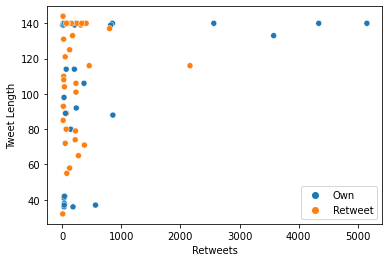

In [284]:
ax = sns.scatterplot(data = pd.DataFrame(np.c_[x_train, y_train]), x = 0, y = 1, hue = 2)
plt.xlabel('Retweets')
plt.ylabel("Tweet Length")
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Own', 'Retweet'], loc='lower right')

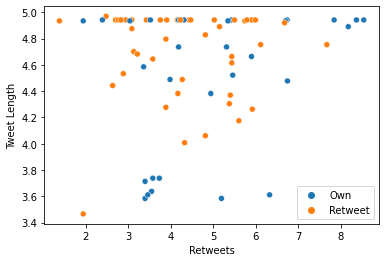

In [285]:
ax = sns.scatterplot(data = pd.DataFrame(np.c_[normalized_x_train, ny_train]), x = 0, y = 1, hue = 2)
plt.xlabel('Retweets')
plt.ylabel("Tweet Length")
#The plot get handles and labels from the previous plot, so no need to declare them again
ax.legend(handles, ['Own', 'Retweet'], loc='lower right')
ax = plt.plot()

## Let's play with the K

In [286]:
knn=KNeighborsClassifier(3)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.55


In [287]:
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.7


In [288]:
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.75


In [289]:
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.7


In [290]:
knn=KNeighborsClassifier(15)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.7


In [291]:
knn=KNeighborsClassifier(19)
knn.fit(normalized_x_train,ny_train)
print(knn.score(normalized_x_test, ny_test))

0.65


# Let's use the best K and change the train/split

In [292]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.05,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print('7 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print('9 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print('11 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))

7 neighbours: 0.6
9 neighbours: 0.6
11 neighbours: 0.6


In [293]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.3,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print('7 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print('9 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print('11 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))

7 neighbours: 0.6666666666666666
9 neighbours: 0.6666666666666666
11 neighbours: 0.6333333333333333


In [294]:
normalized_x_train, normalized_x_test, ny_train, ny_test= train_test_split(x_normalized, y,
                                                   test_size= 0.15,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
knn=KNeighborsClassifier(7)
knn.fit(normalized_x_train,ny_train)
print('7 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(9)
knn.fit(normalized_x_train,ny_train)
print('9 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train,ny_train)
print('11 neighbours: ' + str(knn.score(normalized_x_test,ny_test)))

7 neighbours: 0.7333333333333333
9 neighbours: 0.8
11 neighbours: 0.8


## K-Fold

In [295]:
from sklearn.model_selection import KFold

In [296]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [297]:
def k_fold_score(fold):
  knn_scores = np.empty(0)
  for train_index, test_index in fold.split(x_normalized):
    print("TRAIN indices:", train_index, "TEST indices:", test_index)
    x_train_fold, x_test_fold = x_normalized.iloc[train_index], x_normalized.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    knn_fold=KNeighborsClassifier(9)
    knn_fold.fit(x_train_fold, y_train_fold)
    print(str(knn_fold.score(x_test_fold, y_test_fold)))
    knn_scores = np.append(knn_scores, knn_fold.score(x_test_fold, y_test_fold))
  print("K-Fold average score: " + str(np.mean(knn_scores)))

In [298]:
k_fold_score(kf)

TRAIN indices: [ 0  1  3  4  5  6  9 10 11 12 14 15 17 18 19 20 21 23 25 27 28 29 31 32
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 74 76 77 79 80 81 82 83 84 85 87 88
 89 90 91 94 96 97 98 99] TEST indices: [ 2  7  8 13 16 22 24 26 30 33 53 54 55 73 75 78 86 92 93 95]
0.75
TRAIN indices: [ 0  1  2  4  5  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 46 47 49 50 52 53 54 55
 57 58 59 61 64 65 66 67 69 70 72 73 75 77 78 79 81 83 84 85 86 87 88 89
 91 92 93 94 95 96 97 98] TEST indices: [ 3  6 18 27 43 45 48 51 56 60 62 63 68 71 74 76 80 82 90 99]
0.55
TRAIN indices: [ 2  3  6  7  8  9 10 12 13 14 16 18 19 20 21 22 24 25 26 27 29 30 31 32
 33 36 37 39 43 44 45 46 47 48 49 51 53 54 55 56 57 58 60 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 92 93 94 95 96 97 98 99] TEST indices: [ 0  1  4  5 11 15 17 23 28 34 35 38 40 41 4

In [299]:
kf = KFold(n_splits=4, shuffle=True, random_state=0)
k_fold_score(kf)

TRAIN indices: [ 0  1  4  5  6  9 10 11 12 14 15 17 18 19 20 21 23 25 27 28 29 31 32 34
 35 36 37 38 39 40 41 42 44 46 47 48 49 50 51 52 56 57 58 59 60 61 63 64
 65 66 67 68 69 70 72 74 76 77 79 80 81 82 83 84 85 87 88 89 90 91 94 96
 97 98 99] TEST indices: [ 2  3  7  8 13 16 22 24 26 30 33 43 45 53 54 55 62 71 73 75 78 86 92 93
 95]
0.72
TRAIN indices: [ 0  2  3  7  8  9 10 11 12 13 14 16 19 20 21 22 23 24 25 26 28 29 30 31
 32 33 34 35 36 37 39 43 44 45 46 47 49 50 52 53 54 55 57 58 59 62 64 65
 66 67 69 70 71 72 73 75 77 78 79 81 83 84 85 86 87 88 89 91 92 93 94 95
 96 97 98] TEST indices: [ 1  4  5  6 15 17 18 27 38 40 41 42 48 51 56 60 61 63 68 74 76 80 82 90
 99]
0.6
TRAIN indices: [ 1  2  3  4  5  6  7  8  9 12 13 15 16 17 18 20 21 22 24 25 26 27 30 33
 36 37 38 39 40 41 42 43 44 45 46 47 48 51 53 54 55 56 58 60 61 62 63 64
 65 67 68 69 70 71 72 73 74 75 76 77 78 80 81 82 83 86 87 88 90 92 93 94
 95 96 99] TEST indices: [ 0 10 11 14 19 23 28 29 31 32 34 35 49 50 52 57 59 66 79 